# Data Understanding

### Import Libraries

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
pd.set_option("display.max_rows", 500)

In [4]:
dataPath_Raw = ("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
dataPath_Processed = ("../data/processed/")

In [5]:
pd_raw = pd.read_csv(dataPath_Raw)
pd_raw.head();

### Extract the columns

In [6]:
pd_raw.columns[:];   

In [7]:
time_idX = pd_raw.columns[4:]

In [8]:
df_plot = pd.DataFrame({
    
    'date':time_idX})

df_plot.head();


In [9]:
len(pd_raw['Country/Region'].unique())
pd_raw['Country/Region'].unique();

### Define a DF with Country as a Column Name

In [9]:
pd_raw[pd_raw['Country/Region']=="Afghanistan"];

In [10]:
pd_raw[pd_raw['Country/Region']=="India"].iloc[:,4::].sum(axis=0);

In [10]:
'''country_list = [
    'Italy',
    'US',
    'Spain',
    'Germany',
    'India',
    'Korea, South',
    'China',
    'Brazil'
]'''

country_list = pd_raw['Country/Region'].unique()

In [11]:
for i in country_list:
    df_plot[i] = np.array(pd_raw[pd_raw['Country/Region'] == i].iloc[:,4::].sum(axis=0))

In [12]:
df_plot;

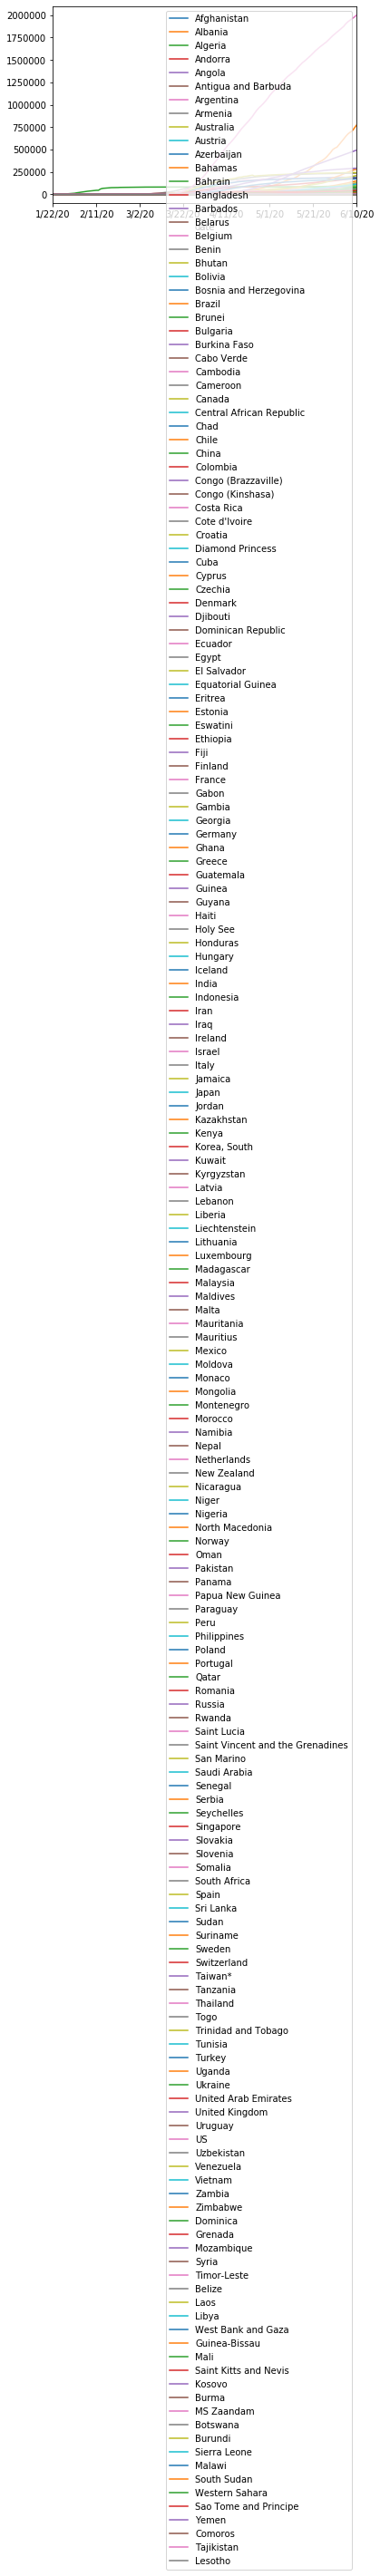

In [13]:
df_plot.set_index('date').plot()

### Data Type Date

In [14]:
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_plot.date[0]

'1/22/20'

In [16]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [17]:
#Convert the String to DateTime object

time_idX = [datetime.strptime(i, "%m/%d/%y") for i in df_plot.date] 

# Converting back to ISO (str)

time_str = [i.strftime("%y-%m-%d") for i in time_idX]

#time_idX

In [18]:

#time_idX[0:5]
#type(time_idX)

In [19]:
df_plot['date']=time_idX
type(df_plot["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_plot.to_csv(dataPath_Processed + "COVID_Flat_Table_Complete.csv", sep=",", index=False)